In [7]:
import sys
import os
import random
import matplotlib.pyplot as plt

# Adicionar diretório src ao path
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_path)

from src.individual import create_individual
from src.fitness import evaluate_fitness
from src.selection import roulette_selection, ranking_selection, tournament_selection
from src.crossover import group_based_crossover, greedy_table_merge_crossover
from src.mutation import swap_mutation, one_point_mutation, multiple_point_mutation

selection_methods = {
    "roulette": roulette_selection,
    "ranking": ranking_selection,
    "tournament": tournament_selection
}

crossover_methods = {
    "group": group_based_crossover,
    "merge": greedy_table_merge_crossover
}

mutation_methods = {
    "swap": swap_mutation,
    "one_point": one_point_mutation,
    "multiple_point": multiple_point_mutation
}

def run_ga(pop_size=100, generations=200, elite_size=1, use_elitism=True,
           selection_type="tournament", crossover_type="group", mutation_type="swap",
           verbose=True, seed=None):
    if seed is not None:
        random.seed(seed)

    select = selection_methods[selection_type]
    crossover = crossover_methods[crossover_type]
    mutate = mutation_methods[mutation_type]

    population = [create_individual() for _ in range(pop_size)]
    
    best_fitness_per_gen = []
    avg_fitness_per_gen = []

    for gen in range(generations):
        scored_pop = [(ind, evaluate_fitness(ind)) for ind in population]
        scored_pop.sort(key=lambda x: x[1], reverse=True)

        if verbose and gen % 10 == 0:
            print(f"Geração {gen} | Best fitness: {scored_pop[0][1]:.2f}")

        best_fitness_per_gen.append(scored_pop[0][1])
        avg_fitness_per_gen.append(sum(score for _, score in scored_pop) / pop_size)

        new_population = []
        if use_elitism:
            elites = [ind for ind, _ in scored_pop[:elite_size]]
            new_population.extend(elites)

        while len(new_population) < pop_size:
            parent1 = select(scored_pop)
            parent2 = select(scored_pop)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, 0.2)
            child2 = mutate(child2, 0.2)
            new_population.extend([child1, child2])

        population = new_population[:pop_size]

    final_scored = [(ind, evaluate_fitness(ind)) for ind in population]
    final_scored.sort(key=lambda x: x[1], reverse=True)
    best_solution, best_score = final_scored[0]

    plt.figure()
    plt.plot(best_fitness_per_gen, label='Best Fitness')
    plt.plot(avg_fitness_per_gen, label='Avg Fitness')
    plt.xlabel("Geração")
    plt.ylabel("Fitness")
    plt.title(f"Evolução do Fitness ({selection_type}, {crossover_type}, {mutation_type})")
    plt.legend()
    plt.grid()
    plt.show()

    return best_solution, best_score


Geração 0 | Best fitness: 19752.00
Geração 10 | Best fitness: 20052.00
Geração 20 | Best fitness: 22752.00
Geração 30 | Best fitness: 22752.00
Geração 40 | Best fitness: 23152.00
Geração 50 | Best fitness: 23257.00
Geração 60 | Best fitness: 23257.00
Geração 70 | Best fitness: 23257.00
Geração 80 | Best fitness: 23257.00
Geração 90 | Best fitness: 23431.00
Geração 100 | Best fitness: 23431.00
Geração 110 | Best fitness: 23431.00
Geração 120 | Best fitness: 23431.00
Geração 130 | Best fitness: 23431.00
Geração 140 | Best fitness: 23857.00


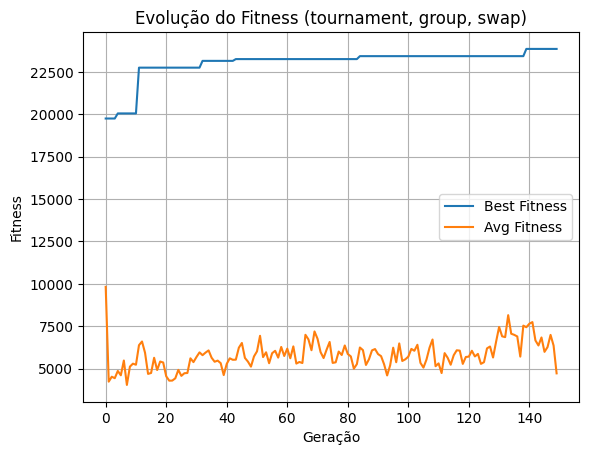

Melhor fitness final: 23857


In [8]:
best_ind, best_score = run_ga(
    pop_size=100,
    generations=150,
    elite_size=2,
    use_elitism=True,
    selection_type="tournament",     # "roulette", "ranking", "tournament"
    crossover_type="group",          # "group", "merge"
    mutation_type="swap",            # "swap", "one_point", "multiple_point"
    seed=42
)
print("Melhor fitness final:", best_score)
